<a href="https://colab.research.google.com/github/OscarBedford/MLCourse_Weekly_Exercises/blob/main/Exercise4_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3 - The goal is to plot a ‘regularization path’ for a given classification problem. Use sklearn.linear_model.LogisticRegression(penalty=’l1’) to fit separate logistic predictive models based on max 1000 brain regions of interest (see ‘n_rois’ argument)
based on the first 80% of the 100 structural brain scans to predict sex differences. Find a grid of 10 different values for the hyperparameter C, and fit a different LogReg model for
each of these choices of C. Then plot the model parameter set with different colors (analogous to the regularization paths that were presented in the lecture, hyperparameter
choice (C) on x axis, model parameter value on y axis), such that the extremes of this grid of increasing C values has all parameter in the model versus none of the parameters in the
model. Called ‘regularization path’.

In [ ]:
!pip install nilearn

In [ ]:
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
yeo = datasets.fetch_atlas_schaefer_2018(n_rois=1000)
masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True,
memory='nilearn_cache')
input_variables =masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == 'F',
dtype=int) #gives 1 for females and 0 for males

In [ ]:
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [33]:
# We use GridSearchCV to compute a grid for the C parameter
clf = GridSearchCV(LogisticRegression(max_iter=1e4,penalty='l1',solver = 'saga'), {
          'C' : np.linspace(0.05,0.2,10) # we set the grid to go from 0.05 to 0.2 in evenly-spaced steps of 10
}, cv = 10) # we will use 10 folds for cross-validation

# We rename and scale the X and y variables
X, y = input_variables, output_variable
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# We fit the GridSearch model and display the results
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.02007165, 0.44820895, 1.01084352, 0.99123521, 1.03824728,
        1.0690614 , 1.08150649, 1.13572795, 1.27654059, 1.47013726]),
 'std_fit_time': array([0.00624006, 0.51087219, 0.30259459, 0.16971394, 0.21561901,
        0.26325706, 0.26624937, 0.23735556, 0.26263828, 0.25181703]),
 'mean_score_time': array([0.0005029 , 0.00045514, 0.00056388, 0.00050452, 0.0005079 ,
        0.00051942, 0.00049965, 0.00050845, 0.00050731, 0.00050807]),
 'std_score_time': array([3.48676963e-05, 7.57446483e-05, 1.36193927e-04, 1.74115605e-05,
        2.30147543e-05, 3.52445566e-05, 1.91810822e-05, 3.59060596e-05,
        2.84162142e-05, 2.04676483e-05]),
 'param_C': masked_array(data=[0.05, 0.06666666666666668, 0.08333333333333334, 0.1,
                    0.11666666666666668, 0.13333333333333336,
                    0.15000000000000002, 0.16666666666666669,
                    0.18333333333333335, 0.2],
              mask=[False, False, False, False, False, False, False, False,

In [34]:
# We turn the results into a pandas dataframe
df = pd.DataFrame(clf.cv_results_) 
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020072,0.006240,0.000503,0.000035,0.05,{'C': 0.05},0.750,0.750,0.750,0.75,0.750,0.625,0.625,0.625,0.625,0.625,0.6875,0.062500,3
1,0.448209,0.510872,0.000455,0.000076,0.066667,{'C': 0.06666666666666668},0.750,0.750,0.750,0.75,0.750,0.625,0.625,0.625,0.625,0.625,0.6875,0.062500,3
2,1.010844,0.302595,0.000564,0.000136,0.083333,{'C': 0.08333333333333334},0.750,0.750,0.750,0.75,0.750,0.625,0.625,0.625,0.625,0.625,0.6875,0.062500,3
3,0.991235,0.169714,0.000505,0.000017,0.1,{'C': 0.1},0.750,0.750,0.750,0.75,0.750,0.625,0.625,0.625,0.500,0.625,0.6750,0.082916,10
4,1.038247,0.215619,0.000508,0.000023,0.116667,{'C': 0.11666666666666668},0.875,0.750,0.750,0.75,0.750,0.625,0.625,0.625,0.500,0.625,0.6875,0.100778,3
5,1.069061,0.263257,0.000519,0.000035,0.133333,{'C': 0.13333333333333336},0.875,0.750,0.875,0.75,0.750,0.750,0.625,0.750,0.500,0.625,0.7250,0.108972,1
6,1.081506,0.266249,0.000500,0.000019,0.15,{'C': 0.15000000000000002},0.875,0.750,0.750,0.75,0.750,0.750,0.625,0.750,0.500,0.500,0.7000,0.114564,2
7,1.135728,0.237356,0.000508,0.000036,0.166667,{'C': 0.16666666666666669},0.875,0.625,0.750,0.75,0.750,0.750,0.625,0.750,0.500,0.500,0.6875,0.115244,3
8,1.276541,0.262638,0.000507,0.000028,0.183333,{'C': 0.18333333333333335},0.875,0.625,0.750,0.75,0.625,0.750,0.625,0.875,0.500,0.500,0.6875,0.128087,3
9,1.470137,0.251817,0.000508,0.000020,0.2,{'C': 0.2},0.875,0.625,0.750,0.75,0.625,0.750,0.625,0.875,0.500,0.500,0.6875,0.128087,3


In [35]:
# We get the iterating variable ready and pre-allocate the variable where the coefficients will go
C_values = df.param_C
coefs = []

In [36]:
for x in C_values: 
    brain_data = datasets.fetch_oasis_vbm(n_subjects=100) 
    yeo = datasets.fetch_atlas_schaefer_2018(n_rois=(1000))  # The ROI value is left constant here
    masker = NiftiLabelsMasker(labels_img=yeo.maps, standardize=True, memory='nilearn_cache') 
    input_variables = masker.fit_transform(brain_data.gray_matter_maps) 
    output_variable = np.array(brain_data.ext_vars.mf == 'F', dtype=np.int)

    lasso = LogisticRegression(max_iter=1e4, penalty = 'l1', C = (x), solver = 'saga').fit

    X, y = input_variables, output_variable
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

    LassoReg = lasso(X_train,y_train) # We fit the LR model
    score_L = LassoReg.score(X_train, y_train)
    score_L = np.multiply(score_L, 100)
    coefs.append(LassoReg.coef_) 
    print('Lasso training accuracy: %.2f' % ((score_L))) # We print the score for each iteration

/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pand

Lasso training accuracy: 68.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 68.75


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 68.75


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 72.50


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 77.50


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 78.75


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 78.75


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 80.00


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 82.50


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/struct.py:774: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Lasso training accuracy: 83.75


In [37]:
# We remove the extraneous dimension from our coefs variable
coefs = np.squeeze(coefs) 

In [38]:
# Let's take a look at how many input variables we're knocking off with each successive value of the C parameter
nums = list(range(0,10))
for x in nums:
    l = np.count_nonzero(coefs[x]==0)
    print(l)

1000
999
996
995
993
992
990
985
984
978


Looks like we're going from 0 to 22 removed input variables. This should make for a plot that's not too cluttered, and therefore easier to visualize.

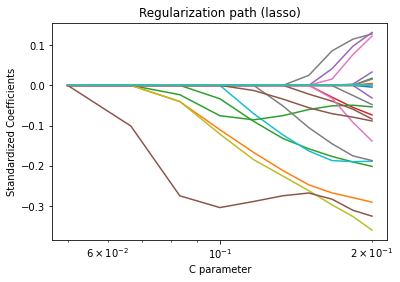

In [41]:
ax = plt.gca()

ax.plot(C_values, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('C parameter')
plt.ylabel('Standardized Coefficients')
plt.title('Regularization path (lasso)');

Most of the first C parameter values after 0.05 result in the shrinkage of only a handful of input variables. As we approach the 0.2 value and beyond, we start seeing some weight being ascribed to a higher number of other input variables, as well as an increase in the shrinkage of another handful of features. In a real-world application, we would plot a legend telling us the names of each input variable.